# The Lennard-Jones Potential #

The Lennard-Jones potential is perhaps the most famous intermolecular pair potential, given by:

$V_{LJ}(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]$

So, the force between two particles in a given cartesian direction, x, is given by:

$F_x(r) = - \frac{\partial V_{LJ}(r)}{\partial x} = -\frac{r_x}{r} \left( \frac{\partial V_{LJ}(r)}{\partial r} \right)$

Which, when expressed using reduced units is:

$F_x^*(r^*) = \frac{48r_x^*}{(r^*)^2} \left[ \left(\frac{1}{r^*} \right)^{12} -0.5\left(\frac{1}{r^*}\right)^6 \right]$

Similarly, the potential function can be written in terms of reduced units:

$V_{LJ}^*(r^*) = 4\left[ \left( \frac{1}{r^*} \right)^{12} - \left( \frac{1}{r^*} \right)^{6} \right]$

If we graph the potential well, this should look familiar. At long distances the potential energy due to forces between a pair of atoms go to zero. As the approach one another, the potential drops below zero (indicating that there are attractive forces between the atoms), and as the atoms get so close they begin to overlap the potential energy shoots up to infinity.

Keep in mind that we will operate in reduced (i.e. dimensionless) units throughout this calculation. Here, we provide the parameters with their units and convert them into their reduced form. The output is going to need to be converted back to units with dimensions so that they will make sense. Later in the class when we simulate a Lennard-Jones fluid, operating in reduced units will allow us to greatly simplify the equations and make our code more scalable. 

Here are the conversions:
| Unit | Symbol | Reduced Form |
| --- | --- | --- |
| Length | $r^{*}$ | $r/\sigma$ |
| Time | $t^{*}$ | $t\sqrt{\frac{\epsilon}{m\sigma^2}}$ |
| Temperature | $T^{*}$ | $\frac{k_BT}{\epsilon}$ |
| Force | $F^{*}$ | $\frac{F\sigma}{\epsilon}$ |
| Energy | $U^{*}$ | $\frac{U}{\epsilon}$ |
| Pressure | $p^{*}$ | $\frac{p\sigma^3}{\epsilon}$ |
| Density | $\rho^{*}$ | $\rho\sigma^3$ |
| Surface Tension | $\gamma^{*}$ | $\frac{\gamma\sigma^2}{\epsilon}$ |

For this calculation we will use the Lennard-Jones parameters for Argon: $\sigma_{Ar}=3.405 \mathrm{Angstroms}$, $\epsilon_{Ar}=0.238 \; \mathrm{kcal} \; \mathrm{mol^{-1}}$, and $m = 0.03994 \; \mathrm{kg} \; \mathrm{mol^{-1}}$. 

The cell below will generate a plot of the system we will be exploring in this demo.

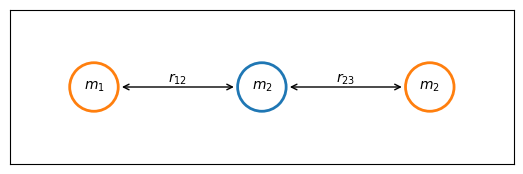

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def coupled_harmonic_oscillator_figure():
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.set_xlim(0, 12)
    ax.set_ylim(1.75, 3.25)
    x = np.linspace(0, 12, 1201)
    ax.text(2, 2.5, r"$m_1$", bbox=dict(boxstyle="circle, pad=1", edgecolor="tab:orange", facecolor="white", linewidth=2), va="center", ha="center")
    ax.text(6, 2.5, r"$m_2$", bbox=dict(boxstyle="circle, pad=1", edgecolor="tab:blue", facecolor="white", linewidth=2), va="center", ha="center")
    ax.text(10, 2.5, r"$m_2$", bbox=dict(boxstyle="circle, pad=1", edgecolor="tab:orange", facecolor="white", linewidth=2), va="center", ha="center")
    ax.text(4, 2.6, r"$r_{12}$", va="center_baseline", ha="center")
    ax.text(8, 2.6, r"$r_{23}$", va="center_baseline", ha="center")
    ax.annotate("", (2.6, 2.5), (5.4, 2.5), arrowprops=dict(arrowstyle="<->", facecolor="k"), va="center", ha="center")
    ax.annotate("", (6.6, 2.5), (9.4, 2.5), arrowprops=dict(arrowstyle="<->", facecolor="k"), va="center", ha="center")
    ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    plt.show()
coupled_harmonic_oscillator_figure()

In [2]:

# We can use lambda functions to quickly create functions for calculating the 1D LJ force and potential
lj_potential = lambda r: 4*((r**-12)-(r**-6))
lj_force = lambda r: 48*((r**-13)-0.5*(r**-7))

# We will start with m2 equidistant from m1 and m3, then move it towards m1, then move it towards m3
x1 = -7
x3 = 7
x2 = np.hstack((np.flip(np.linspace(x1, 0, 50)[1:-1]), np.linspace(x1, x3, 100)[1:-1], np.flip(np.linspace(0, x3, 50)[1:-1])))

# These are our distances in Angstroms
r12 = np.abs(x2-x1)
r23 = np.abs(x2-x3)

# These are our parameters
sigma = 3.405
epsilon = 0.238

# We convert our distances into reduced units
r12_red = r12/sigma
r23_red = r23/sigma

# These are our forces and potentials in reduced units
force12_red = lj_force(r12_red)
force23_red = lj_force(r23_red)
potential12_red = lj_potential(r12_red)
potential23_red = lj_potential(r23_red)

# We convert our forces to kcal mol^-1 angstrom^-1 and potentials to kcal mol^-1
force12 = force12_red*epsilon/sigma
force23 = force23_red*epsilon/sigma
potential12 = potential12_red*epsilon
potential23 = potential23_red*epsilon

In [5]:
%%capture
from matplotlib.patches import Ellipse
import matplotlib.animation as animation
from IPython.display import HTML

def animated_plot():
    fig = plt.figure(figsize=(6.5, 10))
    gs = plt.GridSpec(ncols=1, nrows=3, height_ratios=[4, 6, 6], hspace=0.1,
                      bottom=0.06, top=0.98, left=0.15, right=0.97)

    yin= 40/((16*1.2)*0.92)
    xinperdp = (0.82*6.5)/(x3-x1)
    ydp = yin/xinperdp

    ax = [fig.add_subplot(gs[0])]
    ax = ax + [fig.add_subplot(gs[1], sharex=ax[0]), fig.add_subplot(gs[2], sharex=ax[0])]

    diameter = sigma*2**(1/6)
    bead1 = Ellipse(xy=(x1, 0), width=diameter, height=diameter, facecolor="tab:orange", edgecolor="none")
    ax[0].add_patch(bead1)
    bead3 = Ellipse(xy=(x3, 0), width=diameter, height=diameter, facecolor="tab:purple", edgecolor="none")
    ax[0].add_patch(bead3)
    bead2 = Ellipse(xy=(x2[0], 0), width=diameter, height=diameter, facecolor="none", edgecolor="tab:blue")
    ax[0].add_patch(bead2)
    center2, = ax[0].plot(x2[0], 0, color="tab:blue", markersize=4, marker="o")
    
    ymax=2
    ylimited = (force12<=ymax) * (force23<=ymax)
    x2pos = x2[ylimited]
    vpos = (potential12+potential23)[ylimited]
    fpos = (force12+force23)[ylimited]

    ax[0].set_xlim(x1, x3)
    # ax[0].set_ylim(-diameter*4/7, diameter*4/7)
    ax[0].axvline(x3-sigma*2**(1/6), linewidth=0.75, color="k")
    ax[0].axvline(x1+sigma*2**(1/6), linewidth=0.75, color="k")
    ax[0].set_ylim(-ydp/2, ydp/2)
    ax[0].tick_params(left=False, bottom=True, labelleft=False, labelbottom=False)
    
    ax[1].axhline(0, linewidth=0.75, color="k")
    ax[1].axvline(x3-sigma*2**(1/6), linewidth=0.75, color="k")
    ax[1].axvline(x1+sigma*2**(1/6), linewidth=0.75, color="k")
    ax[1].text(-4, 0.2, r"$V_{LJ,12}$", color="tab:orange", ha="right", fontsize=10, bbox=dict(boxstyle="square", edgecolor="white", facecolor="white", linewidth=2))
    ax[1].text(4, 0.2, r"$V_{LJ,23}$", color="tab:purple", ha="left", fontsize=10, bbox=dict(boxstyle="square", edgecolor="white", facecolor="white", linewidth=2))
    ax[1].plot(x2[48:-48], potential12[48:-48]+potential23[48:-48], color="k")
    ax[1].plot(x2[48:-48], potential12[48:-48], color="tab:orange")
    ax[1].plot(x2[48:-48], potential23[48:-48], color="tab:purple")
    vmarker, = ax[1].plot(x2pos[0], vpos[0], color="tab:blue", markersize=4, marker="o")
    ax[1].set_ylim(-0.25, 0.5)
    ax[1].set_ylabel(r"$V_{LJ}(r)\mathrm{, kcal} \; \mathrm{mol}^{-1}$")
    ax[1].set_xlabel(r"$x_2$")

    ax[2].axhline(0, linewidth=0.75, color="k")
    ax[2].axvline(x3-sigma*2**(1/6), linewidth=0.75, color="k")
    ax[2].axvline(x1+sigma*2**(1/6), linewidth=0.75, color="k")
    ax[2].text(-3.5, 0.2, r"$F_{LJ,12}$", color="tab:orange", ha="right", fontsize=10, bbox=dict(boxstyle="square", edgecolor="white", facecolor="white", linewidth=2))
    ax[2].text(3.5, 0.2, r"$F_{LJ,23}$", color="tab:purple", ha="left", fontsize=10, bbox=dict(boxstyle="square", edgecolor="white", facecolor="white", linewidth=2))
    ax[2].plot(x2[48:-48], force12[48:-48]+force23[48:-48], color="k")
    ax[2].plot(x2[48:-48], force12[48:-48], color="tab:orange")
    ax[2].plot(x2[48:-48], force23[48:-48], color="tab:purple")
    fmarker, = ax[2].plot(x2pos[0], fpos[0], color="tab:blue", markersize=4, marker="o")
    ax[2].set_ylim(-0.25, 0.5)
    ax[2].tick_params(labelbottom=False)
    ax[2].set_ylabel(r"$F_{LJ}(r)\mathrm{, kcal} \; \mathrm{mol}^{-1} \; \mathrm{\AA}^{-1}$")

    def run(i):
        '''
        Function passed to FuncAnimation to update plot
        '''
        bead2.set_center((x2pos[i], 0))
        center2.set_data([x2pos[i]], [0])
        fmarker.set_data([x2pos[i]], [fpos[i]])
        vmarker.set_data([x2pos[i]], [vpos[i]])
        return bead2, center2, fmarker, vmarker

    ani = animation.FuncAnimation(fig, run, frames=len(x2pos), interval=300)
    return ani

ani = animated_plot().to_jshtml()

In [6]:
HTML(ani)